In [1]:
from __future__ import print_function

import sys
import os
from glob import glob
from time import time
%matplotlib inline
#%load_ext autoreload
#%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
import tables as tb
import numpy as np
import math
#plt.rcParams['figure.figsize'] = 10,8
import datetime

from   invisible_cities.database import load_db
from   invisible_cities.core.system_of_units_c import SystemOfUnits
import invisible_cities.sierpe.blr as blr
import invisible_cities.core.mpl_functions as mpl
import invisible_cities.reco.wfm_functions as wfm
import invisible_cities.reco.tbl_functions as tbl
import invisible_cities.core.peak_functions_c as cpf
import invisible_cities.reco.pmaps_functions as pf
import invisible_cities.core.sensor_functions as sf
from   invisible_cities.core.core_functions import define_window

import invisible_cities.core.pmaps_functions_c as cpm
from   invisible_cities.core.core_functions import lrange
 
units = SystemOfUnits()
t0 = time()

In [2]:
import S1S2prop as prop
import plotting as plot

In [3]:
#%%
#mydf_file = os.environ['IC_DATA']+'/irene/Kr/pmaps_NEXT_v0_08_09_Kr_ACTIVE_55_0_7bar__10000.root.h5'
mydf_file = os.environ['IC_DATA']+'/irene/Co/pmaps_NEXT_v0_08_09_Co56_INTERNALPORTANODE_102_0_7bar__10000.root.h5'
print(mydf_file)

mydf = pf.read_pmaps(mydf_file)
#mydf
list(map(type, mydf))
S1df   = mydf[0]
S2df   = mydf[1]
S2Sidf = mydf[2]
print('S1df entries (tbins x events):',len(S1df))
print('S2df entries (tbins x events):',len(S2df))
print('S2Sidf entries:',len(S2Sidf))
type(S1df)
print('Keys of S1df panda dataframe: {} '.format(S1df.keys()))
print('Keys of S2df panda dataframe: {} '.format(S2df.keys()))
print('Keys of S2Sidf panda dataframe: {} '.format(S2Sidf.keys()))

# Convert S12df object  (an S12 pytable read as a PD dataframe) and return an S12L dictionary (list of dict, first dict)
S1dict = pf.df_to_pmaps_dict(S1df,10000)
S2dict = pf.df_to_pmaps_dict(S2df,10000)
S2Sidict = pf.df_to_s2si_dict (S2Sidf,10000)


evid_S1min = sorted(S1dict.keys())[0]
evid_S1max = sorted(S1dict.keys())[-1]
evid_S2min = sorted(S2dict.keys())[0]
evid_S2max = sorted(S2dict.keys())[-1]
evid_S2Simin = sorted(S2Sidict.keys())[0]
evid_S2Simax = sorted(S2Sidict.keys())[-1]
print('First/last event ID (first item in sorted S1 dictionary): {}/{}'.format(evid_S1min,evid_S1max))
print('First/last event ID (first item in sorted S2 dictionary): {}/{}'.format(evid_S2min,evid_S2max))
print('First/last event ID (first item in sorted S2Si dictionary): {}/{}'.format(evid_S2Simin, evid_S2Simax))
print('Total number of events in S1 = {}'.format(len(S1dict)))
print('Total number of events in S2 = {}'.format(len(S2dict)))
print('Total number of events in S2Si = {}'.format(len(S2Sidict)))
len(S1dict), type(S1dict), len(S2dict), type(S2dict), len(S2Sidict), type(S2Sidict)

/Users/neus/InvCities/data/irene/Co/pmaps_NEXT_v0_08_09_Co56_INTERNALPORTANODE_102_0_7bar__10000.root.h5
S1df entries (tbins x events): 86917
S2df entries (tbins x events): 171844
S2Sidf entries: 1649113
Keys of S1df panda dataframe: Index(['event', 'evtDaq', 'peak', 'time', 'ene'], dtype='object') 
Keys of S2df panda dataframe: Index(['event', 'evtDaq', 'peak', 'time', 'ene'], dtype='object') 
Keys of S2Sidf panda dataframe: Index(['event', 'evtDaq', 'peak', 'nsipm', 'nsample', 'ene'], dtype='object') 
First/last event ID (first item in sorted S1 dictionary): 1/9996
First/last event ID (first item in sorted S2 dictionary): 0/9996
First/last event ID (first item in sorted S2Si dictionary): 0/9996
Total number of events in S1 = 9070
Total number of events in S2 = 9963
Total number of events in S2Si = 9606


(9070,
 invisible_cities.reco.pmap_io.S12,
 9963,
 invisible_cities.reco.pmap_io.S12,
 9606,
 invisible_cities.reco.pmap_io.S2Si)

In [4]:
S1 = prop.S12Prop(S1dict)
S2 = prop.S12Prop(S2dict)

type(S1)
S2.length, S1.length
S1.dict().keys() == S2.dict().keys()

False

In [5]:
S1map = S1.S1S2mapd(S2)[0]
S2map = S1.S1S2mapd(S2)[1]
S1map.dict().keys() == S2map.dict().keys()

True

In [6]:
S1map.length

9069

## S1 features

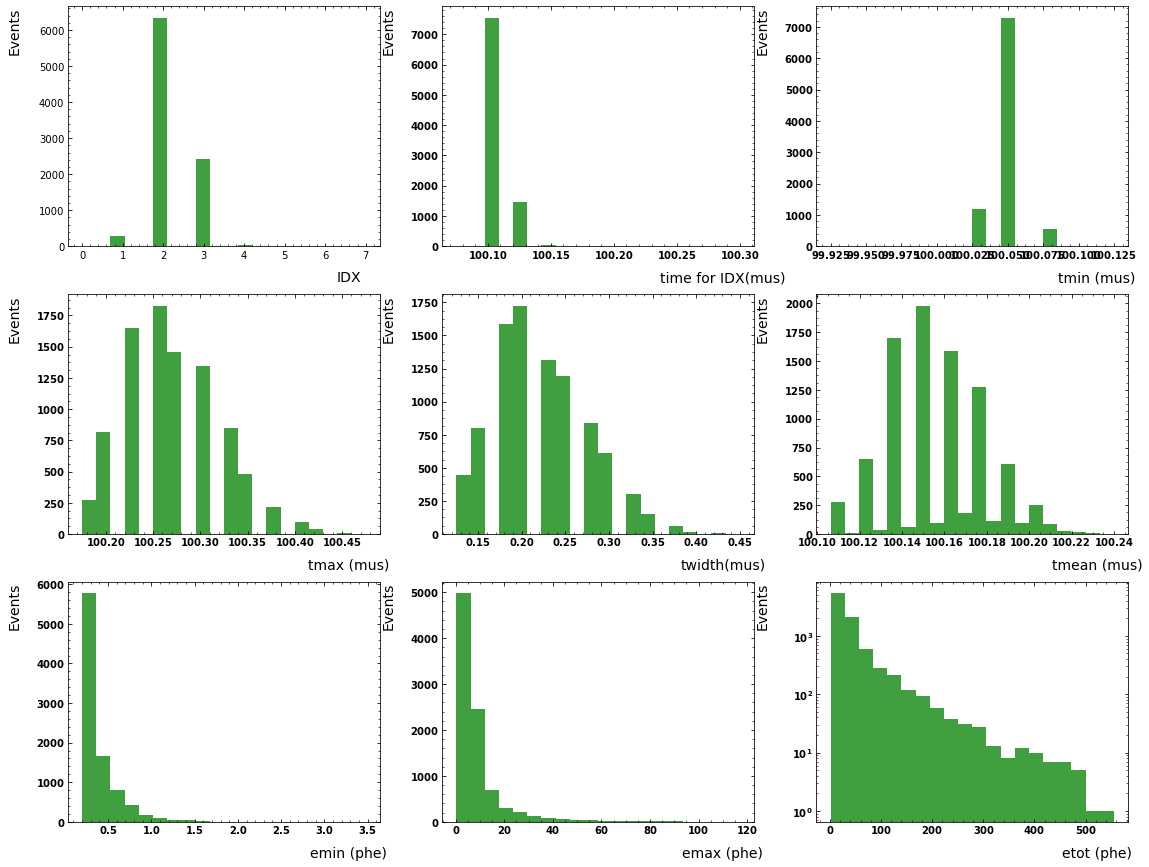

In [7]:
fig = plt.figure(figsize = (19,15))
ax1 = fig.add_subplot(3,3,1)
plot.multh1(S1map.IDX, 20,    ax1, color="green", title="", xlabel ="IDX", ylabel = "Events")
#ax1.set_yscale('log')
ax2 = fig.add_subplot(3,3,2)
plot.multh1(S1map.tIDX, 20,   ax2, color="green", title="", xlabel ="time for IDX(mus)", ylabel = "Events")
ax3 = fig.add_subplot(3,3,3)
plot.multh1(S1map.tmin, 20,   ax3, color="green", title="", xlabel ="tmin (mus)", ylabel = "Events")
ax4 = fig.add_subplot(3,3,4)
plot.multh1(S1map.tmax, 20,   ax4, color="green", title="", xlabel ="tmax (mus)", ylabel = "Events")
ax5 = fig.add_subplot(3,3,5)
plot.multh1(S1map.twidth, 20, ax5, color="green", title="", xlabel ="twidth(mus)", ylabel = "Events")
ax6 = fig.add_subplot(3,3,6)
plot.multh1(S1map.tmean, 20,  ax6, color="green", title="", xlabel ="tmean (mus)", ylabel = "Events")
ax7 = fig.add_subplot(3,3,7)
plot.multh1(S1map.emin, 20,   ax7, color="green", title="", xlabel ="emin (phe)", ylabel = "Events")
ax8 = fig.add_subplot(3,3,8)
plot.multh1(S1map.emax, 20,   ax8, color="green", title="", xlabel ="emax (phe)", ylabel = "Events")
ax9 = fig.add_subplot(3,3,9)
plot.multh1(S1map.etot, 20,   ax9, color="green", title="", xlabel ="etot (phe)", ylabel = "Events")
ax9.set_yscale('log')

## S2 features

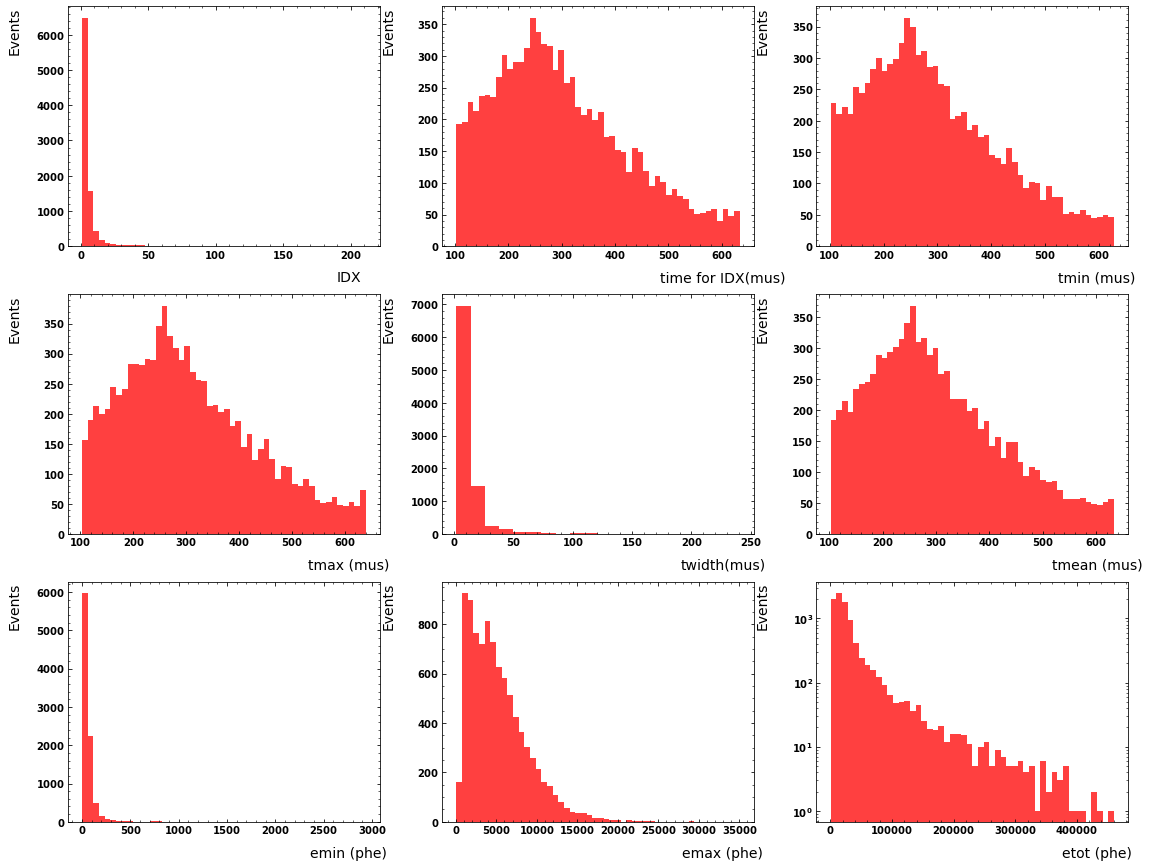

In [8]:
fig = plt.figure(figsize = (19,15))
ax1 = fig.add_subplot(3,3,1)
plot.multh1(S2map.IDX, 50,    ax1, color="red", title="", xlabel ="IDX", ylabel = "Events")
#ax1.set_yscale('log')
ax2 = fig.add_subplot(3,3,2)
plot.multh1(S2map.tIDX, 50,   ax2, color="red", title="", xlabel ="time for IDX(mus)", ylabel = "Events")
ax3 = fig.add_subplot(3,3,3)
plot.multh1(S2map.tmin, 50,   ax3, color="red", title="", xlabel ="tmin (mus)", ylabel = "Events")
ax4 = fig.add_subplot(3,3,4)
plot.multh1(S2map.tmax, 50,   ax4, color="red", title="", xlabel ="tmax (mus)", ylabel = "Events")
ax5 = fig.add_subplot(3,3,5)
plot.multh1(S2map.twidth, 20, ax5, color="red", title="", xlabel ="twidth(mus)", ylabel = "Events")
ax6 = fig.add_subplot(3,3,6)
plot.multh1(S2map.tmean, 50,  ax6, color="red", title="", xlabel ="tmean (mus)", ylabel = "Events")
ax7 = fig.add_subplot(3,3,7)
plot.multh1(S2map.emin, 50,   ax7, color="red", title="", xlabel ="emin (phe)", ylabel = "Events")
ax8 = fig.add_subplot(3,3,8)
plot.multh1(S2map.emax, 50,   ax8, color="red", title="", xlabel ="emax (phe)", ylabel = "Events")
ax9 = fig.add_subplot(3,3,9)
plot.multh1(S2map.etot, 50,   ax9, color="red", title="", xlabel ="etot (phe)", ylabel = "Events")
ax9.set_yscale('log')

<module 'matplotlib.pyplot' from '/Users/neus/miniconda/envs/IC3.5/lib/python3.5/site-packages/matplotlib/pyplot.py'>

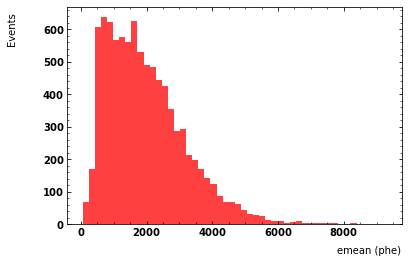

In [9]:
plot.h1(S2map.emean, 50,   color="red", title="", xlabel ="emean (phe)", ylabel = "Events")

In [10]:
z = S2map.tIDX - S1map.tIDX

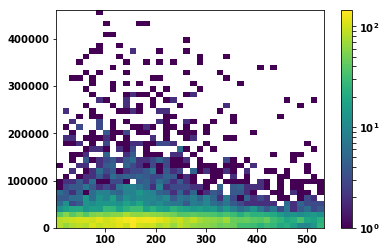

In [11]:
from matplotlib.colors import LogNorm
plt.hist2d(z, S2map.etot, bins=40, norm=LogNorm())
plt.colorbar()
plt.show()

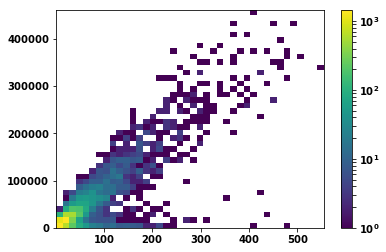

In [12]:
plt.hist2d(S1map.etot, S2map.etot, bins=40, norm=LogNorm())
plt.colorbar()
plt.show()

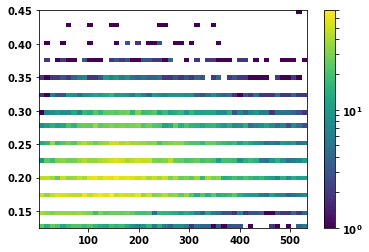

In [13]:
plt.hist2d(z,S1map.twidth, bins=50, norm=LogNorm())
plt.colorbar()
plt.show()

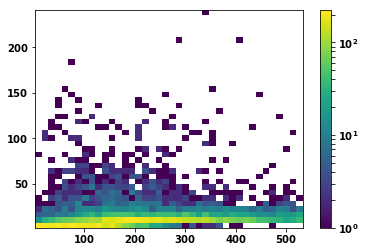

In [14]:
plt.hist2d(z,S2map.twidth, bins=40, norm=LogNorm())
plt.colorbar()
plt.show()

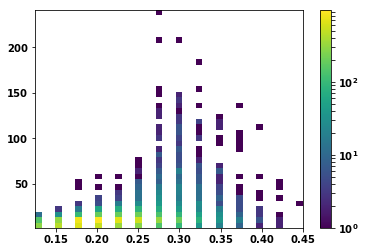

In [15]:
plt.hist2d(S1map.twidth,S2map.twidth, bins=40, norm=LogNorm())
plt.colorbar()
plt.show()

## S2Si features 

### first, obtain intersection of dicts:

In [16]:
filt_dict = lambda x, y: dict([ (i , x[i] ) for i in x if i in set(y) ])
      
keys_S1 = set(S1dict.keys())
keys_S2 = set(S2dict.keys())
intsect = keys_S1 & keys_S2

S1map   = filt_dict(S1dict,intsect)
S2map   = filt_dict(S2dict,intsect)

In [17]:
keys_S2map =  set(S2map.keys())
keys_S2Si  =  set(S2Sidict.keys())
intsect = keys_S2map & keys_S2Si

S2map_Si = filt_dict(S2map,intsect)
S2Simap  = filt_dict(S2Sidict,intsect)

In [18]:
len(S2map_Si)

8963

In [19]:
S2map_Si.keys() == S2Simap.keys() 

True

In [20]:
S2map.keys() == S2map_Si.keys()

False

In [21]:
len(S2map) 

9069

In [22]:
len(S2Sidict)

9606

In [23]:
len(S2Simap) == 8963 == len(S2map_Si)

True

In [24]:
s2si = prop.S2SiProp(S2Simap)

lenght Q= 6, type = <class 'list'>
lenght xsi= 6, type = <class 'list'>
lenght ysi= 6, type = <class 'list'>
++++++++
lenght Q= 5, type = <class 'list'>
lenght xsi= 5, type = <class 'list'>
lenght ysi= 5, type = <class 'list'>
++++++++
lenght Q= 7, type = <class 'list'>
lenght xsi= 7, type = <class 'list'>
lenght ysi= 7, type = <class 'list'>
++++++++
lenght Q= 13, type = <class 'list'>
lenght xsi= 13, type = <class 'list'>
lenght ysi= 13, type = <class 'list'>
++++++++
lenght Q= 2, type = <class 'list'>
lenght xsi= 2, type = <class 'list'>
lenght ysi= 2, type = <class 'list'>
++++++++
lenght Q= 2, type = <class 'list'>
lenght xsi= 2, type = <class 'list'>
lenght ysi= 2, type = <class 'list'>
++++++++
lenght Q= 5, type = <class 'list'>
lenght xsi= 5, type = <class 'list'>
lenght ysi= 5, type = <class 'list'>
++++++++
lenght Q= 2, type = <class 'list'>
lenght xsi= 2, type = <class 'list'>
lenght ysi= 2, type = <class 'list'>
++++++++
lenght Q= 4, type = <class 'list'>
lenght xsi= 4, typ

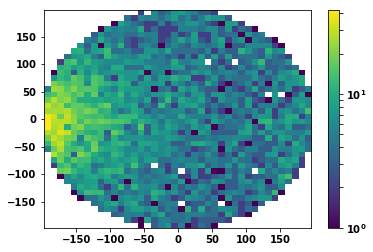

In [25]:
from matplotlib.colors import LogNorm
plt.hist2d(s2si.x, s2si.y, bins=40, norm=LogNorm())
plt.colorbar()
plt.show()

(array([ 1452.,  1325.,  1132.,   926.,   833.,   793.,   659.,   602.,
          592.,   429.]),
 array([-197.80912747, -158.43348528, -119.05784308,  -79.68220088,
         -40.30655868,   -0.93091649,   38.44472571,   77.82036791,
         117.1960101 ,  156.5716523 ,  195.9472945 ]),
 <a list of 10 Patch objects>)

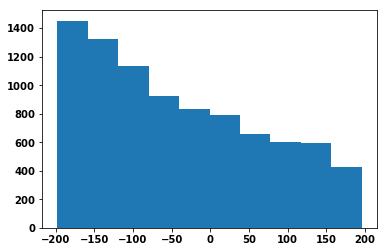

In [26]:
plt.hist(s2si.x)

(array([ 8070.,  8236.,  7294.,  6095.,  5393.,  4872.,  4140.,  3866.,
         3491.,  2127.]),
 array([-205., -164., -123.,  -82.,  -41.,    0.,   41.,   82.,  123.,
         164.,  205.]),
 <a list of 10 Patch objects>)

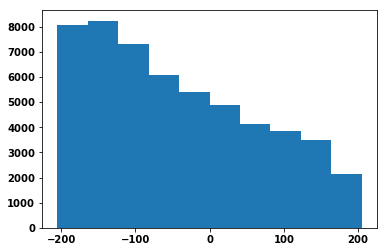

In [27]:
plt.hist(s2si.xsipms)

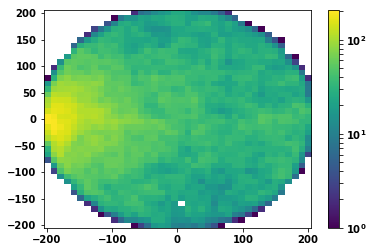

In [28]:
from matplotlib.colors import LogNorm
plt.hist2d(s2si.xsipms, s2si.ysipms, bins=40, norm=LogNorm())
plt.colorbar()
plt.show()

### Open the pytable file for MC truth extraction

In [29]:
table = tb.open_file(mydf_file,mode='r')

In [31]:
table.root

/ (RootGroup) ''
  children := ['PMAPS' (Group)]

In [ ]:
table_truth = table.root.MC.MCTracks
table = table_truth[:]

In [ ]:
Truth_dict = xxx(table)

### Intersect Truth-dict with S2Si-reco-dict


In [32]:
keys_Truth_dict =  set(Truth_dict.keys())
keys_S2Si  =  set(S2Sidict.keys())
intsect = keys_Truth_dict & keys_S2Si

Truth_dict_map = filt_dict(Truth_dict,intsect)
S2Simap  = filt_dict(S2Sidict,intsect)

NameError: name 'Truth_dict' is not defined

In [ ]:
T = prop.Truth_S2SiProp(Truth_dict_map)

In [33]:
len(Truth_dict_map)

NameError: name 'Truth_dict_map' is not defined

In [ ]:
plt.hist(T.xtruth)

In [ ]:
plt.hist(T.ytruth)

In [ ]:
plt.hist(T.edepo)

In [ ]:
plt.hist(T.energies)

In [ ]:
plt.hist(T.xposition)

In [ ]:
plt.hist(T.yposition)

In [ ]:
from matplotlib.colors import LogNorm
plt.hist2d(T.xposition, T.yposition, bins=40, norm=LogNorm())
plt.colorbar()
plt.show()

In [ ]:
## Truth-reco comparison